# Semantic Texual Similarity (STS)

---

**A. The Basics**
- STS simply is the task of assessing the degree to which two short texts are similar to each other in terms of meaning. Usually takes the form of assigning a score from 0 to 1 (or from 0 to 5), where a higher score signifies high similarirty or semantic quivalence between the two texts.
- Semantic textual similarity measures can be broadly categorized into knowledge-based, statistical or corpus-based, surface-based or lexical matching, vector space model, word alignment based, and machine or deep learningbased.
- The majority of the promising solutions presented in the literature are supervised systems, which use machine learning or deep learning techniques with feature engineering to assess the semantic similarity between sentence-pairs.
- The performance of supervised learning depends primarily on the
training model and the data sets used in the training phase, with prior knowledge to the output of some sentence-pairs. ***This is a major constraint of the supervised approaches due to the difficulty in providing training data sets for the learning process***, especially for the low-resourced languages. Therefore, ***unsupervised approaches are more preferable because they do not require any training data.***
  - Unsupervised word aligner is proposed, which uses a huge multilingual semantic-knowledge network resource named **BabelNet**. The BabelNet network contains millions of concepts and named entities with a large number of semantic relations between them, which gives the ability to semantically align small phrases, idioms, named entities, or abbreviations.
  - The three proposed unsupervised approaches are string kernel-based (SK), alignment-based (AL), and weighted alignment-based (WAL). A supervised machine learning approach is introduced as well in the paper used as reference for this information ([[SOURCE] UESTS: An Unsupervised Ensemble Semantic Textual Similarity Method](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8746255))

- Also is multilingual - solving future problems with international data...

**B. Different Approaches**


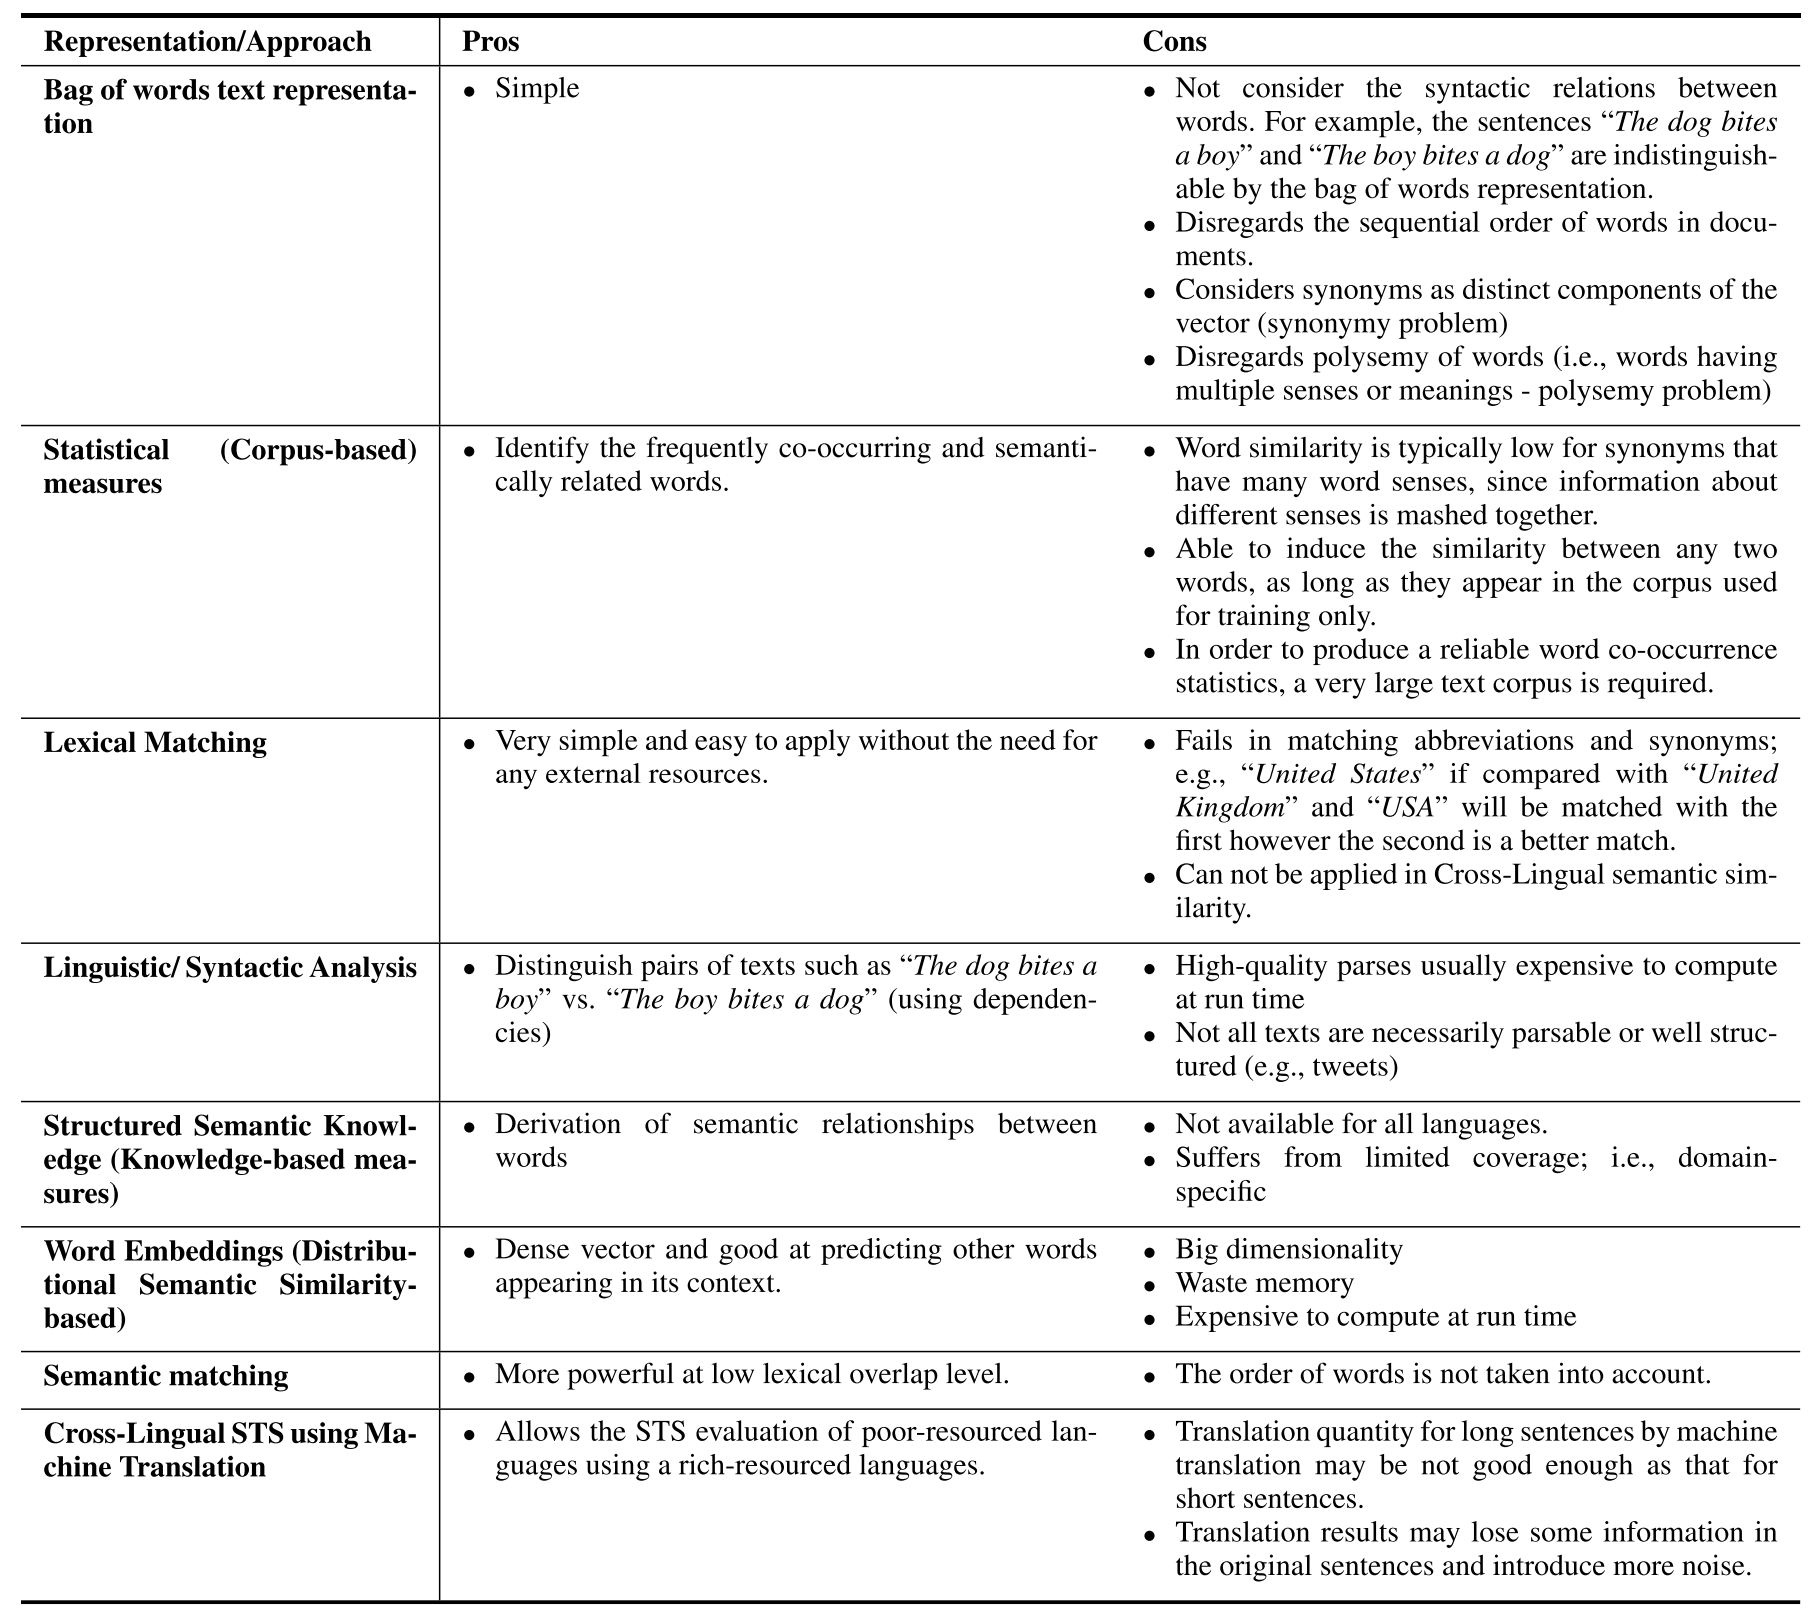

---

# **THE DATA FOR THE MODEL:** Working with the trade data...

Two steps:
1. identify core/battery shipments
2. pull out the amount of cores from the identified shipment

**The basics:**
The data contains both structured (most of the columns) and unstructured data (the text columns describing shipment contents), so we will use an ensemble model to target both.

**Feature Engineering:** For the structured data, we won't be creating many features, but we could create a few for those that indicate a core is present, like the size, weight, or HTS codes. For the unstructured data, it might be worth converting the text into features using techniques such as TF-IDF or word embeddings.

**Model Selection:** For the structured data, we could use any model which works for numeric and categorical features - like random forests or XGBoost. For the unstructured data we should us a Natural Language Processing Model - there are two approaches here. One approach is to do something simple using the TF-IDF to vectorize the data and then run that through Logisitic Regression or Naive Bayes. The other approach is to use a deep learning model - like the ones above - or LSTM networks or Transformers (i.e. GPT).

**Ensemble Model Selection:** After training the previous models for both the structured and unstructured data, then we can combine the predictions into an emsemble model. We have many options for the ensemble model, which include voting ensembvle, weighted ensemble, and stacking ensemble - each with their own different bennefits.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
true_data = pd.read_excel("Panjiva_USExportsImports_854911_2022-2023.xlsx")
tech_data = pd.read_excel("Panjiva_USImportsExports_TechKeywordSearch_4Q2023.xlsx")

In [ ]:
true_data.shape

(2889, 26)

In [ ]:
tech_data.shape

(7422, 26)

*Add a column of 1s to represent core*

In [ ]:
true_data["core_shipment"] = 1

*Create Label Encoder for later...*

In [ ]:
label_encoder = LabelEncoder()

### I. Split the structured and unstructured data

In [ ]:
true_dataStr = true_data.loc[:, true_data.columns != 'Goods Shipped']
true_dataUnStr = true_data.loc[:, ["Goods Shipped", "core_shipment"]]

In [ ]:
true_dataStr.head() #structured data

,Date,Matching Fields,Consignee,Consignee Full Address,Consignee Trade Roles,Consignee Ultimate Parent,Consignee Ultimate Parent Profile,Shipper,Shipper Country,Shipper Full Address,...,Port of Lading Country,Port of Unlading,Port of Unlading Country,Transport Method,HS Code,Weight (KG),Value (USD),Data Source,Data Source Trade Direction,core_shipment
0,2023-12-31,HS Code (6-digit): 854911,NaN,NaN,NaN,NaN,NaN,Dachser Usa Air & Sea Logistics,United States,"20 W Lincoln Ave, Valley Stream, NY 11580, USA",...,United States,Valencia (ES),Spain,Maritime,1007.90; 8549.11,186038.64,56416.33,US Exports,Export,1
1,2023-12-31,HS Code (6-digit): 854911,Eswari Global Metal Industries,PRIVATE LIMITED PLOT NO.101-A ANDB 96 & 97 IND...,Manufacturer,Eswari Global Metal Industries Private Limited,https://panjiva.com/Eswari-Global-Metal-Indust...,Ocean Network Express (Canada) Inc.,Canada,"5090 Explorer Dr, Mississauga, ON L4W 4T9, Canada",...,Canada,Tacoma (US),United States,Maritime,8549.11,378084.00,319000.00,US Imports,Import,1
2,2023-12-31,HS Code (6-digit): 854911,NaN,NaN,NaN,NaN,NaN,Dachser Usa Air & Sea Logistics,United States,"20 W Lincoln Ave, Valley Stream, NY 11580, USA",...,United States,Valencia (ES),Spain,Maritime,1007.90; 8549.11,113350.92,34373.69,US Exports,Export,1
3,2023-12-31,HS Code (6-digit): 854911,NaN,NaN,NaN,NaN,NaN,Dachser Usa Air & Sea Logistics,United States,"20 W Lincoln Ave, Valley Stream, NY 11580, USA",...,United States,Valencia (ES),Spain,Maritime,1007.90; 8549.11,185590.04,56280.17,US Exports,Export,1
4,2023-12-31,HS Code (6-digit): 854911,NaN,NaN,NaN,NaN,NaN,Zimex Logitech Inc.,United States,"5816 Corporate Ave, Cypress, CA 90630, USA",...,United States,Busan (KR),South Korea,Maritime,8549.11,169412.00,163313.17,US Exports,Export,1


In [ ]:
true_dataUnStr.head() # unstructured data

,Goods Shipped,core_shipment
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
1,LEAD BATTERY SCRAP AS PER ISRI CODE\nLEAD BATT...,1
2,\n\n\n\n\n\n\n\n\n\n\n\nUN 2794 BATTERIES (CLA...,1
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
4,8X40'HC CONTAINERS (100 PALLET(S)) USED BATTER...,1


### II. Use Label Encoder on Structured Dataset Columns

*Important Decision:* Do we (a) split the HS code column or do we (b) use the label encoder and treat the unique combinations of HS codes as *\'categories'* ?


- Option B would benefit from core shipments occuring with certain items more commonly than others. So given that, since I am assuming they with have common items that they ship with, I will use option b

In [ ]:
true_dataStr["HS_Code_encoded"] = label_encoder.fit_transform(true_dataStr["HS Code"])

In [ ]:
true_dataStr["HS_Code_encoded"].unique()

array([ 1, 49, 27, 40, 45, 26,  8, 50, 53, 46, 31, 10, 55, 43,  0,  6, 57,
        4, 30, 36, 18, 23, 32, 56, 54, 19,  7, 24, 48, 42, 22, 51, 52, 25,
       17, 37, 41, 20,  5,  2, 34,  9, 13,  3, 11, 44, 38, 33, 14, 39, 28,
       21, 16, 12, 15, 29, 47, 35])

*NOTE*: So we have 58 options (meaning there was 58 different combinations of HS codes within the true dataset... implying we got alot to go off of!)

- *Now time to encode the other categorical columns...*

In [ ]:
true_dataStr.columns

Index(['Date', 'Matching Fields', 'Consignee', 'Consignee Full Address',
       'Consignee Trade Roles', 'Consignee Ultimate Parent',
       'Consignee Ultimate Parent Profile', 'Shipper', 'Shipper Country',
       'Shipper Full Address', 'Shipper Trade Roles',
       'Shipper Ultimate Parent', 'Shipper Ultimate Parent Profile',
       'Shipment Origin', 'Shipment Destination', 'Port of Lading',
       'Port of Lading Country', 'Port of Unlading',
       'Port of Unlading Country', 'Transport Method', 'HS Code',
       'Weight (KG)', 'Value (USD)', 'Data Source',
       'Data Source Trade Direction', 'core_shipment', 'HS_Code_encoded'],
      dtype='object')

*So we can drop the Matching Fields Column (since that is used within panjiva to signal which columns matched the search)...*

In [ ]:
true_dataStr = true_dataStr.drop('Matching Fields', axis=1)

*We can drop date...*

In [ ]:
true_dataStr = true_dataStr.drop("Date", axis=1)

*Now **'Consignee',...'Consignee Ultimate Parent Profile'** has na values, but we don't want to drop those rows - so first we must convert missing values so that the encoder can label it...*

In [ ]:
true_dataStr['Consignee'].fillna("na", inplace=True)

In [ ]:
true_dataStr['Consignee_encoded'] = label_encoder.fit_transform(true_dataStr['Consignee'])

In [ ]:
# drop the consignee address since it is implied by the consignee (so it is redundant)
true_dataStr = true_dataStr.drop('Consignee Full Address', axis=1)

In [ ]:
true_dataStr['Consignee Trade Roles'].fillna("na", inplace=True)

In [ ]:
true_dataStr['Consignee_Trade_Roles_encoded'] = label_encoder.fit_transform(true_dataStr['Consignee Trade Roles'])

In [ ]:
true_dataStr['Consignee Ultimate Parent'].fillna("na", inplace=True)

In [ ]:
true_dataStr['Consignee_Ultimate_Parent_encoded'] = label_encoder.fit_transform(true_dataStr['Consignee Ultimate Parent'])

In [ ]:
# drop the parent profile since it is implied by the parent (so it is redundant)
true_dataStr = true_dataStr.drop('Consignee Ultimate Parent Profile', axis=1)

*Now **'Shipper', ... 'Shipper Ultimate Parent Profile'** we need to follow a similar process to Consignee columns...*

In [ ]:
shipmentCols = ['Shipper', 'Shipper Country', 'Shipper Trade Roles', 'Shipper Ultimate Parent']
shipmentCols_toDrop = ['Shipper Full Address', 'Shipper Ultimate Parent Profile']

In [ ]:
for col in shipmentCols:
  true_dataStr[col].fillna("na", inplace=True)
  true_dataStr[col + '_encoded'] = label_encoder.fit_transform(true_dataStr[col])

In [ ]:
for col in shipmentCols_toDrop:
  true_dataStr = true_dataStr.drop(col, axis=1)

*Now **'Shipment Origin', 'Shipment Destination', 'Port of Lading',
       'Port of Lading Country', 'Port of Unlading',
       'Port of Unlading Country', 'Transport Method'** we need to do a similar process...*

In [ ]:
newCols = ['Shipment Origin', 'Shipment Destination', 'Port of Lading', 'Port of Lading Country', 'Port of Unlading', 'Port of Unlading Country']

***'Transport Method'*** *has only one options, so first we will drop that col. Every other col we will convert NaN and label encode...*

In [ ]:
true_dataStr = true_dataStr.drop('Transport Method', axis=1)

In [ ]:
for col in newCols:
  true_dataStr[col].fillna("na", inplace=True)
  true_dataStr[col + '_encoded'] = label_encoder.fit_transform(true_dataStr[col])

*Now* ***'Data Source', 'Data Source Trade Direction'*** *are the only columns left since* ***'HS Code'*** *is already done and* ***'Weight (KG)', 'Value (USD)'***  *are numeric...*

- Data source is 'US export/import' and Data Source Trade Direction is 'export/import' so we only need to do the first one and can drop the trade direction...

In [ ]:
true_dataStr = true_dataStr.drop('Data Source Trade Direction', axis=1)

In [ ]:
true_dataStr['Data Source'].fillna("na", inplace=True)
true_dataStr['Data_Source_encoded'] = label_encoder.fit_transform(true_dataStr['Data Source'])

### III. Select the encoded columns plus the numeric columns to use for the model

In [ ]:
true_dataStr.columns

Index(['Consignee', 'Consignee Trade Roles', 'Consignee Ultimate Parent',
       'Shipper', 'Shipper Country', 'Shipper Trade Roles',
       'Shipper Ultimate Parent', 'Shipment Origin', 'Shipment Destination',
       'Port of Lading', 'Port of Lading Country', 'Port of Unlading',
       'Port of Unlading Country', 'HS Code', 'Weight (KG)', 'Value (USD)',
       'Data Source', 'core_shipment', 'HS_Code_encoded', 'Consignee_encoded',
       'Consignee_Trade_Roles_encoded', 'Consignee_Ultimate_Parent_encoded',
       'Shipper_encoded', 'Shipper Country_encoded',
       'Shipper Trade Roles_encoded', 'Shipper Ultimate Parent_encoded',
       'Shipment Origin_encoded', 'Shipment Destination_encoded',
       'Port of Lading_encoded', 'Port of Lading Country_encoded',
       'Port of Unlading_encoded', 'Port of Unlading Country_encoded',
       'Data_Source_encoded'],
      dtype='object')

In [ ]:
true_dataStr_model = true_dataStr[['core_shipment',
              'HS_Code_encoded',
              'Consignee_encoded',
              'Consignee_Trade_Roles_encoded',
              'Consignee_Ultimate_Parent_encoded',
              'Shipper_encoded',
              'Shipper Country_encoded',
              'Shipper Trade Roles_encoded',
              'Shipper Ultimate Parent_encoded',
              'Shipment Origin_encoded',
              'Shipment Destination_encoded',
              'Port of Lading_encoded',
              'Port of Lading Country_encoded',
              'Port of Unlading_encoded',
              'Port of Unlading Country_encoded',
              'Data_Source_encoded',
              'Weight (KG)',
              'Value (USD)']]

In [ ]:
true_dataStr_model

,core_shipment,HS_Code_encoded,Consignee_encoded,Consignee_Trade_Roles_encoded,Consignee_Ultimate_Parent_encoded,Shipper_encoded,Shipper Country_encoded,Shipper Trade Roles_encoded,Shipper Ultimate Parent_encoded,Shipment Origin_encoded,Shipment Destination_encoded,Port of Lading_encoded,Port of Lading Country_encoded,Port of Unlading_encoded,Port of Unlading Country_encoded,Data_Source_encoded,Weight (KG),Value (USD)
0,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,186038.64,56416.33
1,1,49,16,3,12,90,0,0,49,1,4,51,2,44,24,1,378084.00,319000.00
2,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,113350.92,34373.69
3,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,185590.04,56280.17
4,1,49,71,10,42,150,23,2,48,26,19,12,24,5,18,0,169412.00,163313.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,39946.00,62315.76
2885,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,40113.00,62576.28
2886,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,40129.00,62601.24
2887,1,51,71,10,42,30,23,14,49,26,13,40,24,5,18,0,71442.00,111449.52


### (STEPS 1-3) **Function to Transform data**

In [ ]:
def transform_tradeData(dataset, label_encoder=label_encoder):

  dataStr = dataset.loc[:, dataset.columns != 'Goods Shipped']
  dataUnStr = dataset.loc[:, ["Goods Shipped", "core_shipment"]]

  newCols = ["HS Code",
             'Consignee',
             'Consignee Trade Roles',
             'Consignee Ultimate Parent',
             'Shipper',
             'Shipper Country',
             'Shipper Trade Roles',
             'Shipper Ultimate Parent',
             'Shipment Origin',
             'Shipment Destination',
             'Port of Lading',
             'Port of Lading Country',
             'Port of Unlading',
             'Port of Unlading Country',
             'Data Source']

  cols_toDrop = ['Matching Fields',
                 "Date",
                 'Consignee Full Address',
                 'Consignee Ultimate Parent Profile',
                 'Transport Method',
                 'Shipper Full Address',
                 'Shipper Ultimate Parent Profile',
                 'Data Source Trade Direction']

  for col in newCols:
    dataStr[col].fillna("na", inplace=True)
    dataStr[col + '_encoded'] = label_encoder.fit_transform(dataStr[col])
  for col in cols_toDrop:
    dataStr = dataStr.drop(col, axis=1)

  dataStr_model = dataStr[['core_shipment',
              'HS Code_encoded',
              'Consignee_encoded',
              'Consignee Trade Roles_encoded',
              'Consignee Ultimate Parent_encoded',
              'Shipper_encoded',
              'Shipper Country_encoded',
              'Shipper Trade Roles_encoded',
              'Shipper Ultimate Parent_encoded',
              'Shipment Origin_encoded',
              'Shipment Destination_encoded',
              'Port of Lading_encoded',
              'Port of Lading Country_encoded',
              'Port of Unlading_encoded',
              'Port of Unlading Country_encoded',
              'Data Source_encoded',
              'Weight (KG)',
              'Value (USD)']]

  return dataStr_model, dataUnStr

In [ ]:
dataStr, dataUnstr = transform_tradeData(true_data, label_encoder)

<ipython-input-36-120a4b1bed30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataStr[col].fillna("na", inplace=True)


In [ ]:
dataStr

,core_shipment,HS Code_encoded,Consignee_encoded,Consignee Trade Roles_encoded,Consignee Ultimate Parent_encoded,Shipper_encoded,Shipper Country_encoded,Shipper Trade Roles_encoded,Shipper Ultimate Parent_encoded,Shipment Origin_encoded,Shipment Destination_encoded,Port of Lading_encoded,Port of Lading Country_encoded,Port of Unlading_encoded,Port of Unlading Country_encoded,Data Source_encoded,Weight (KG),Value (USD)
0,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,186038.64,56416.33
1,1,49,16,3,12,90,0,0,49,1,4,51,2,44,24,1,378084.00,319000.00
2,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,113350.92,34373.69
3,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,185590.04,56280.17
4,1,49,71,10,42,150,23,2,48,26,19,12,24,5,18,0,169412.00,163313.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,39946.00,62315.76
2885,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,40113.00,62576.28
2886,1,51,71,10,42,31,23,14,49,26,13,35,24,5,18,0,40129.00,62601.24
2887,1,51,71,10,42,30,23,14,49,26,13,40,24,5,18,0,71442.00,111449.52


In [ ]:
dataUnstr

,Goods Shipped,core_shipment
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
1,LEAD BATTERY SCRAP AS PER ISRI CODE\nLEAD BATT...,1
2,\n\n\n\n\n\n\n\n\n\n\n\nUN 2794 BATTERIES (CLA...,1
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
4,8X40'HC CONTAINERS (100 PALLET(S)) USED BATTER...,1
...,...,...
2884,SPENT LEAD/ACID BATTERIES CLASS 8 LABEL/SUB-RI...,1
2885,SPENT LEAD/ACID BATTERIES H.S. CODE 8549.11.10...,1
2886,CLASS 8 LABEL/SUB-RISK CORROSIVE UN2794 SPENT ...,1
2887,"SPENT LEAD/ACID BATTERIES\nUN2794, CLASS 8\nEM...",1


### V. Tranformations to Tech dataset (*and future datasets*)

Add transformation to technology dataset. First remove the rows with HS Code Combinations in the true data that are in the technology database aswell. Then add a col for core_shipment = 0. Then it is ready for the function...

In [ ]:
hs_coreCombos = list(true_data["HS Code"].unique())

In [ ]:
tech_data = tech_data.dropna(subset=['HS Code'])
tech_data['core_shipment'] = tech_data['HS Code'].str.contains('8549.11').astype(int)

<ipython-input-41-5a174c33b2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data['core_shipment'] = tech_data['HS Code'].str.contains('8549.11').astype(int)


In [ ]:
tech_data["core_shipment"].unique()

array([0])

In [ ]:
tech_data.shape

(7416, 27)

No shipments in the tech dataframe contains a core HTS code, so therefor we can assume for now that there are none. **BUT** we should have her search for something completely different like produce or shoes, and use those to train the model with the true data as well and then run that new model on the tech data.

***So we should plan to come up with a series of different terms that are generally not cores, like produce and shoes - and use that to combine with the true data instead of the tech. Then train a new model with that data and compare...***

In [ ]:
tech_str, tech_unStr = transform_tradeData(tech_data, label_encoder)

<ipython-input-36-120a4b1bed30>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataStr[col].fillna("na", inplace=True)


In [ ]:
tech_str

,core_shipment,HS Code_encoded,Consignee_encoded,Consignee Trade Roles_encoded,Consignee Ultimate Parent_encoded,Shipper_encoded,Shipper Country_encoded,Shipper Trade Roles_encoded,Shipper Ultimate Parent_encoded,Shipment Origin_encoded,Shipment Destination_encoded,Port of Lading_encoded,Port of Lading Country_encoded,Port of Unlading_encoded,Port of Unlading Country_encoded,Data Source_encoded,Weight (KG),Value (USD)
0,0,298,26,5,726,1369,54,18,673,9,7,95,6,95,52,1,65160.00,433000.0
1,0,334,1073,1,248,1024,54,18,673,9,59,95,6,95,52,1,20000.00,78500.0
2,0,298,836,6,726,814,8,4,673,9,59,95,6,95,52,1,17200.00,114000.0
3,0,1573,1326,20,726,836,8,2,118,9,59,119,6,34,52,1,43929.97,357000.0
4,0,1298,50,4,31,995,2,5,498,3,59,17,40,58,52,1,31281.00,670000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,0,2422,301,1,726,1369,54,18,673,51,59,7,38,14,52,1,1501.00,33000.0
7418,0,650,292,1,126,168,19,7,98,22,59,120,6,58,52,1,12959.00,199000.0
7419,0,323,1038,5,583,503,8,11,251,9,59,7,38,48,52,1,98200.00,408000.0
7420,0,1130,889,18,726,873,54,18,114,4,59,2,2,14,52,1,2306.00,41100.0


In [ ]:
tech_unStr

,Goods Shipped,core_shipment
0,BROMOXYNIL OCTANOATE TECH\nBROMOXYNIL OCTANOAT...,0
1,TOCOPHERYL ACETATE TECH GRADE REF 10745340 NON...,0
2,BROMOXYNIL OCTANOATE TECH 97%,0
3,MEN'S 100%ORGANIC COTTON KNIT TEE MEN'S 100% C...,0
4,MEN'S TECH FLEECE CARGO JOGGER\nMEN'S TECH FLE...,0
...,...,...
7417,PO#6479387738INTERACTIVE SMART MAGNETIC EXERC ...,0
7418,BLACK CONDUCTIVE TRAYS BLACK CONDUCTIVE TRAYS ...,0
7419,ATRAZINE TECH IMO CLASS 9 UN NO 3077 PCK GR II...,0
7420,SO00030909-PO 640PL00024103-24/08/2023V281661 ...,0


In [ ]:
full_tradeData_str = pd.concat([dataStr, tech_str], axis=0).reset_index(drop=True)

In [ ]:
full_tradeData_str

,core_shipment,HS Code_encoded,Consignee_encoded,Consignee Trade Roles_encoded,Consignee Ultimate Parent_encoded,Shipper_encoded,Shipper Country_encoded,Shipper Trade Roles_encoded,Shipper Ultimate Parent_encoded,Shipment Origin_encoded,Shipment Destination_encoded,Port of Lading_encoded,Port of Lading Country_encoded,Port of Unlading_encoded,Port of Unlading Country_encoded,Data Source_encoded,Weight (KG),Value (USD)
0,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,186038.64,56416.33
1,1,49,16,3,12,90,0,0,49,1,4,51,2,44,24,1,378084.00,319000.00
2,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,113350.92,34373.69
3,1,1,71,10,42,27,23,0,49,26,19,34,24,50,19,0,185590.04,56280.17
4,1,49,71,10,42,150,23,2,48,26,19,12,24,5,18,0,169412.00,163313.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10300,0,2422,301,1,726,1369,54,18,673,51,59,7,38,14,52,1,1501.00,33000.00
10301,0,650,292,1,126,168,19,7,98,22,59,120,6,58,52,1,12959.00,199000.00
10302,0,323,1038,5,583,503,8,11,251,9,59,7,38,48,52,1,98200.00,408000.00
10303,0,1130,889,18,726,873,54,18,114,4,59,2,2,14,52,1,2306.00,41100.00


In [ ]:
full_tradeData_unStr = pd.concat([dataUnstr, tech_unStr], axis=0).reset_index(drop=True)

In [ ]:
full_tradeData_unStr

,Goods Shipped,core_shipment
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
1,LEAD BATTERY SCRAP AS PER ISRI CODE\nLEAD BATT...,1
2,\n\n\n\n\n\n\n\n\n\n\n\nUN 2794 BATTERIES (CLA...,1
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nUN 279...,1
4,8X40'HC CONTAINERS (100 PALLET(S)) USED BATTER...,1
...,...,...
10300,PO#6479387738INTERACTIVE SMART MAGNETIC EXERC ...,0
10301,BLACK CONDUCTIVE TRAYS BLACK CONDUCTIVE TRAYS ...,0
10302,ATRAZINE TECH IMO CLASS 9 UN NO 3077 PCK GR II...,0
10303,SO00030909-PO 640PL00024103-24/08/2023V281661 ...,0


# **BUILDING & TRAINING THE MODELS:** Working with the transformed data...

In [ ]:
# DATASETS: full_tradeData_unStr, full_tradeData_str

### THE UNSTRUCTURED MODEL:

Here is a description of options - each researched and then given to chat gpt to then summarize + some extra details from me **:)** :

1. **Transformers (by Hugging Face)**
 - ***Description:*** The Transformers library by Hugging Face is the most popular and comprehensive library for working with state-of-the-art NLP models, including GPT, BERT, and their variants. It provides thousands of pre-trained models that can be fine-tuned on a custom dataset for tasks like classification, translation, and more.
 - ***Usage for Classification:*** You can use the GPT or its variants from this library for text classification by fine-tuning a pre-trained model on your specific dataset.
 - ***Installation:*** pip install transformers
 - ***Website:*** [Hugging Face Transformers](https://huggingface.co/docs)

2. **Simple Transformers**
 - ***Description:*** Built on top of the Transformers library, Simple Transformers simplifies the process of training and using transformer models for a variety of tasks, including binary and multi-class text classification.
 - ***Usage for Classification:*** It allows for an easy and straightforward way to fine-tune pre-trained models like GPT on your classification dataset with minimal code.
 - ***Installation: ***pip install simpletransformers
 - ***Website:*** [Simple Transformers](https://simpletransformers.ai/)

3. **FastAI**
 - ***Description:*** FastAI offers a high-level API on top of PyTorch, facilitating the development and training of deep learning models, including NLP tasks. While it's not GPT-specific, FastAI makes it relatively straightforward to implement and train models, including language models, for classification.
 - ***Usage for Classification:*** FastAI can be used for text classification tasks by fine-tuning pre-trained language models (like AWD-LSTM, which is included in FastAI) and can be extended to work with transformer models.
 - ***Installation:*** pip install fastai
 - ***Website:*** [FastAI](https://www.fast.ai/)

4. **GPT-3 (via OpenAI API)**
 - ***Description:*** For those looking specifically to leverage GPT-3 for classification without the need to fine-tune models locally, the OpenAI API provides access to GPT-3 models that can be used for a variety of tasks, including text classification, directly via API calls.
 - ***Usage for Classification:*** You can use the OpenAI API to send text to GPT-3 and receive classification labels based on the training or instructions you provide in the prompt.
 - ***Installation:*** Access through the OpenAI API, with usage based on API calls. See OpenAI documentation for API keys and usage.
 - ***Website:*** [OpenAI API](https://openai.com/product)


- For direct access to GPT-3 or GPT-4 for classification, consider using the OpenAI API.
- If you're looking to fine-tune models on custom datasets, Hugging Face's Transformers or Simple Transformers will be more suitable.
- For a broader approach that isn't limited to GPT models, FastAI offers a user-friendly interface for training deep learning models on a variety of tasks, including NLP.
- Always consider the computational resources and costs associated with training or using large models, especially for tasks like text classification where simpler models might suffice.


[**Transformers by Hugging Face**](https://huggingface.co/docs/transformers/index)

*We want to target NLP - natural language processing...*

**Our Options:**

[*link*](https://huggingface.co/docs/transformers/index#supported-models-and-frameworks)

- Options include BART, BERT, GPT, etc. (bunch of different options, which vary based off use-case - we should target something good at text classification)

- Also all of them support pytorch, and some work on tensorflow and flax support as well
 - "The table below represents the current support in the library for each of those models, whether they have a Python tokenizer (called “slow”). A “fast” tokenizer backed by the 🤗 Tokenizers library, whether they have support in Jax (via Flax), PyTorch, and/or TensorFlow..." - [*huggingface.co*](https://huggingface.co/docs/transformers/index#supported-models-and-frameworks)
 - Still not sure on pricing - if it is a free alternative to gpt, best to start here and then branch out to the gpt api construction if this works and is successful. It basically provides the ooportunity to verify our work before paying a premium model (and more permanant solution).

[This is an example of using tranformers for classification](https://huggingface.co/docs/transformers/en/tasks/sequence_classification)
- This list of model architectures is valid model options for the proposed task.
- The model predicts 0 or 1 for whether a review was positive, we will be doing the same but **0 or 1 for whether a core is present in the shipment**


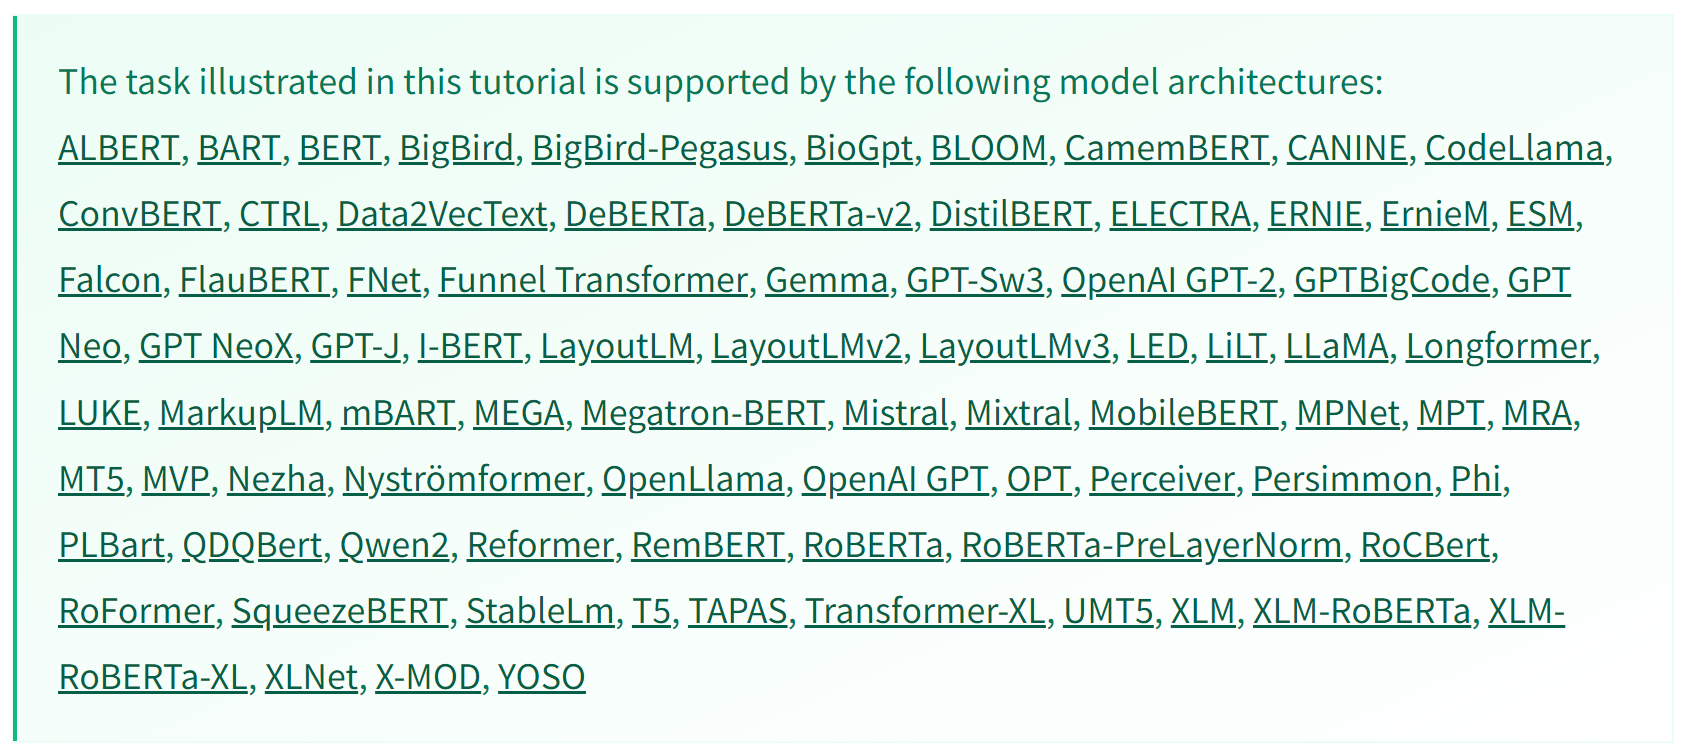

**Examples of Natural Language Processing (NLP) Models:**

- https://huggingface.co/docs/transformers/en/tasks/token_classification
- https://huggingface.co/docs/transformers/en/tasks/question_answering
- https://huggingface.co/docs/transformers/en/tasks/language_modeling
- https://huggingface.co/docs/transformers/en/tasks/masked_language_modeling
- https://huggingface.co/docs/transformers/en/tasks/translation
- https://huggingface.co/docs/transformers/en/tasks/summarization
- https://huggingface.co/docs/transformers/en/tasks/multiple_choice


When ***fine-tuning a pretrained model*** ([supporting documents](https://huggingface.co/docs/transformers/en/training)) it will change some predefined weights and throw a warning message - that is **normal**, just means the pretrained version is being adapted to our data requirements.

Also **don't have to specify a loss function**, rather hugging face will automatically pick one that works best with the given situation.

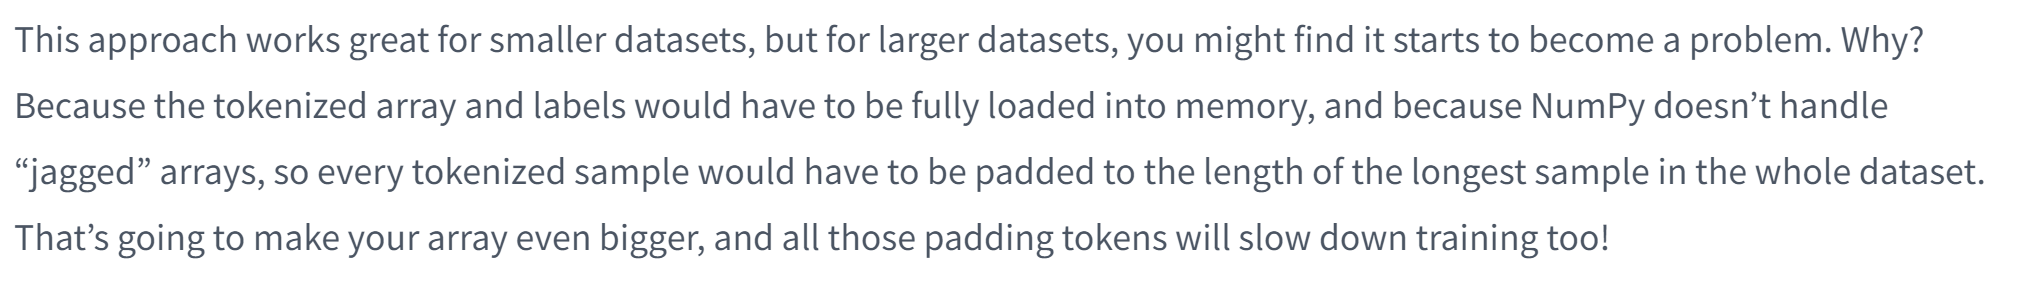

In [ ]:
#import transformers...

**GPT PRICING:**

*Fine Tuning Models:* 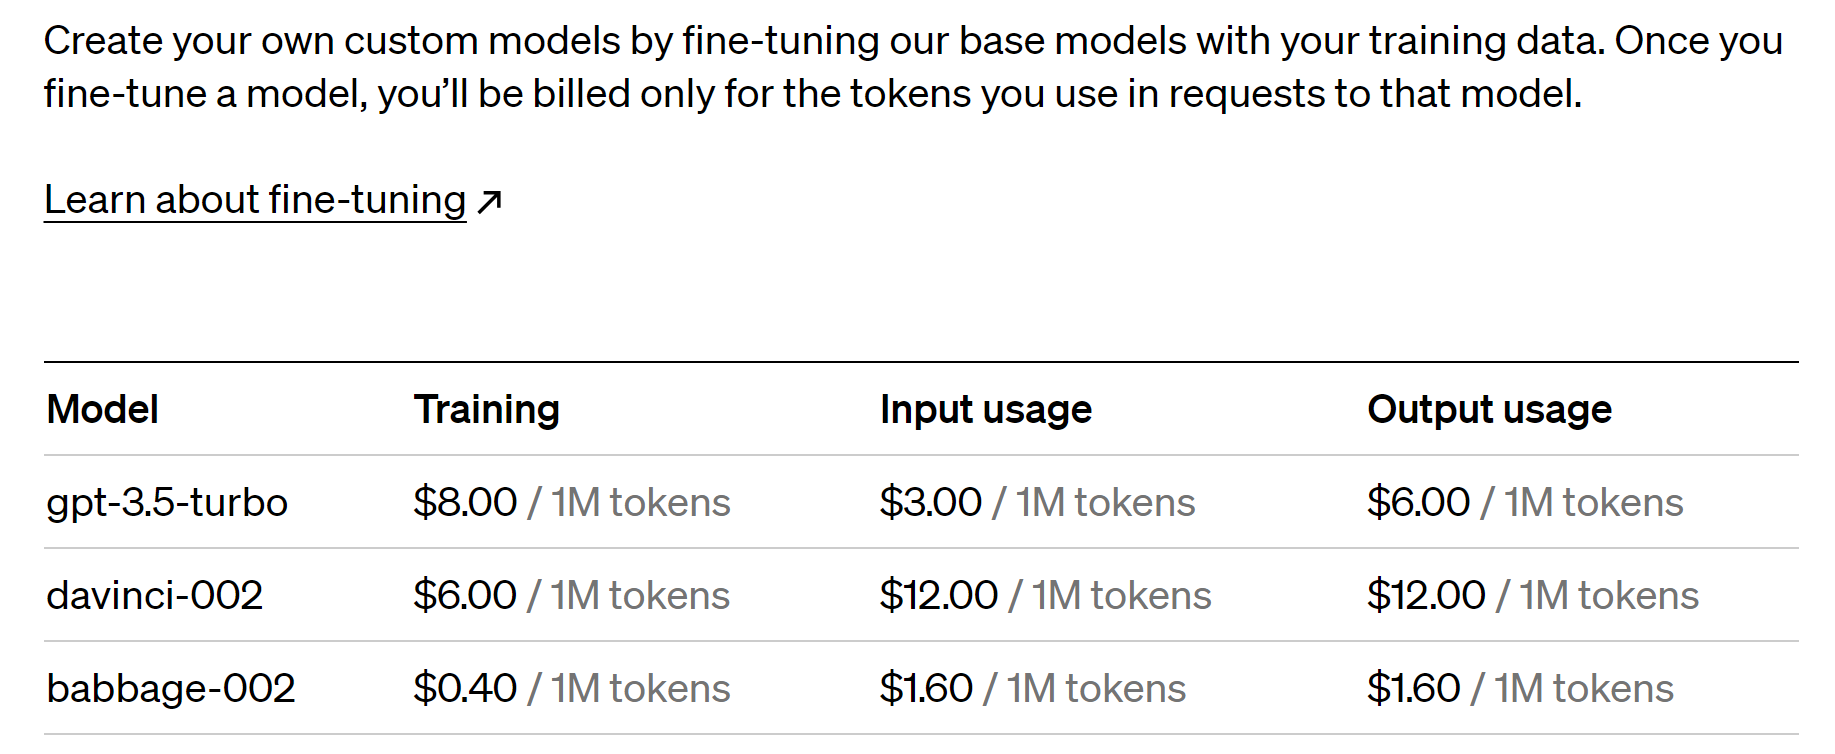

*GPT-3.5 TURBO*
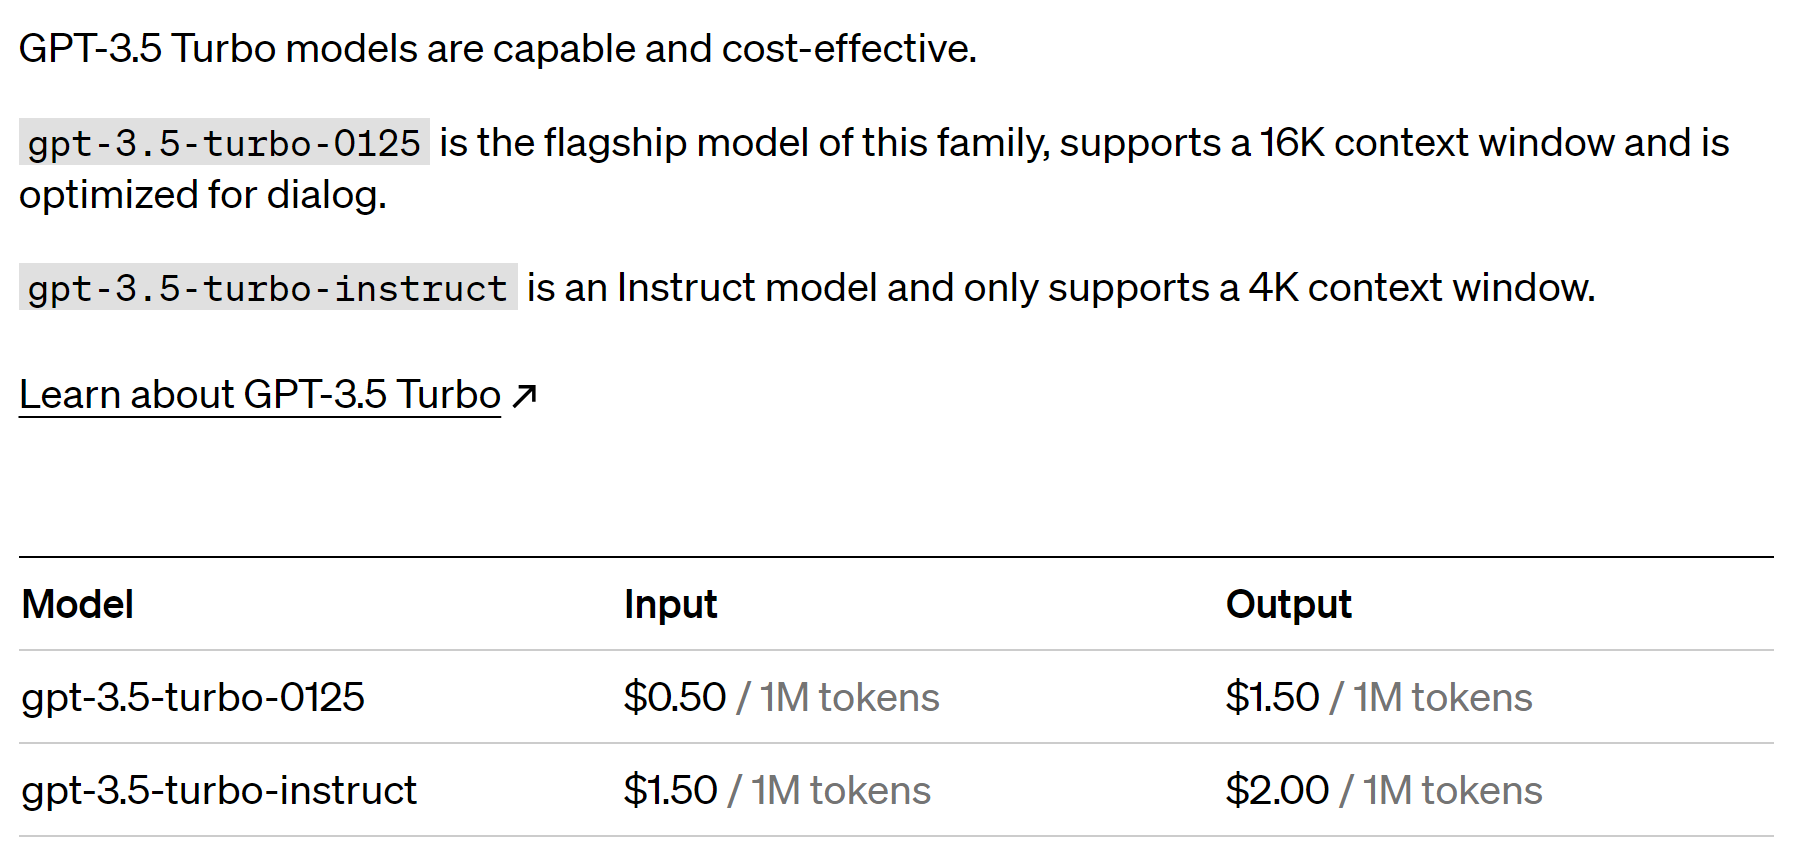

*EMBEDDING MODEL* 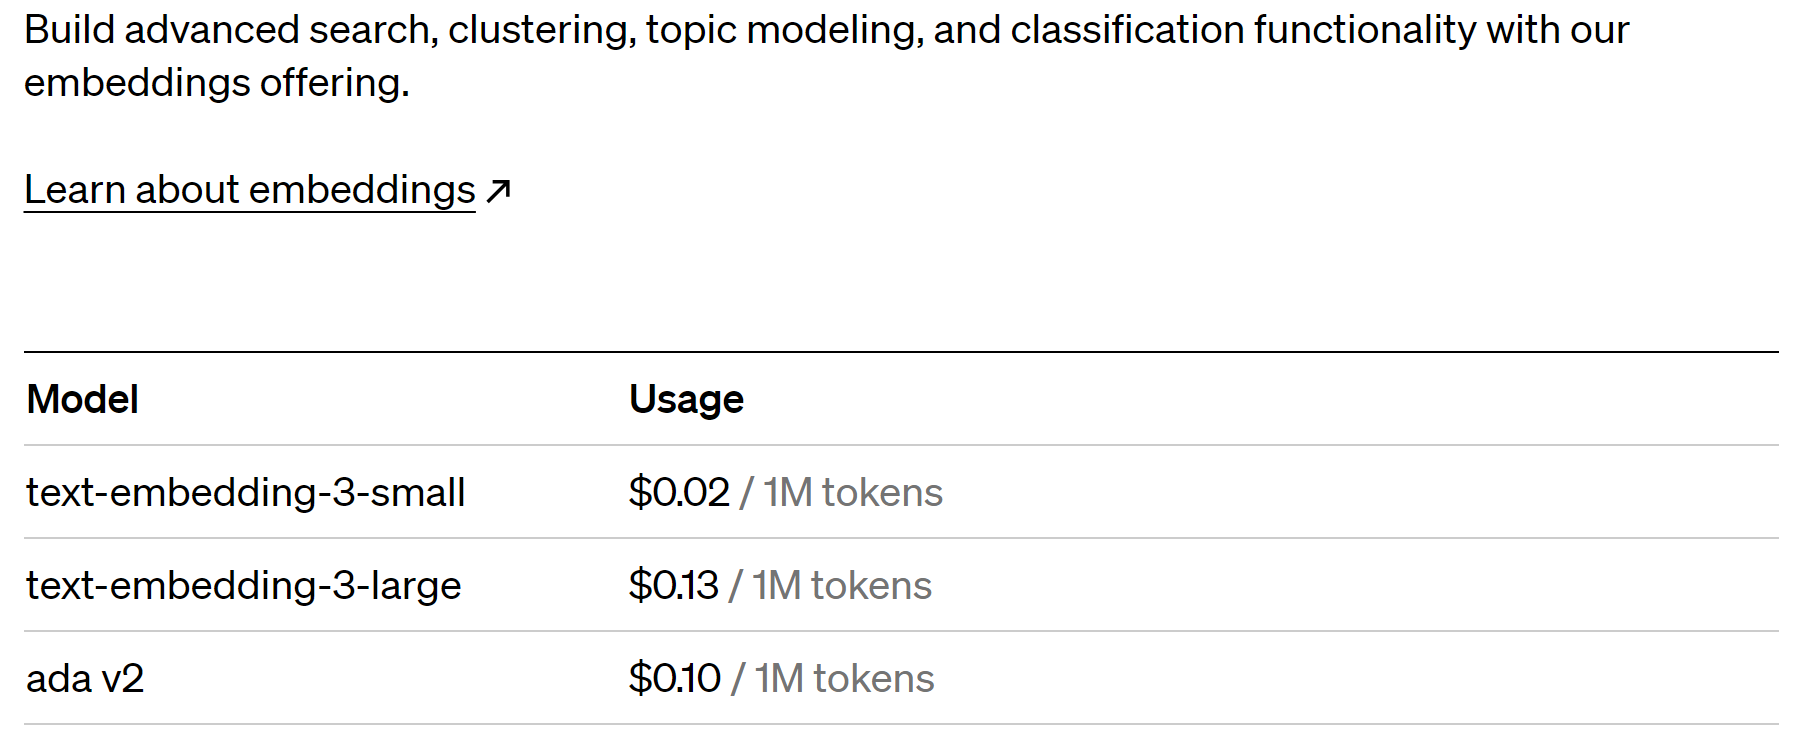

*I personally think embedding is likely the best choice...*
[Embeddings API Documentation](https://platform.openai.com/docs/guides/embeddings)

[Token Pricing Information](https://platform.openai.com/tokenizer)
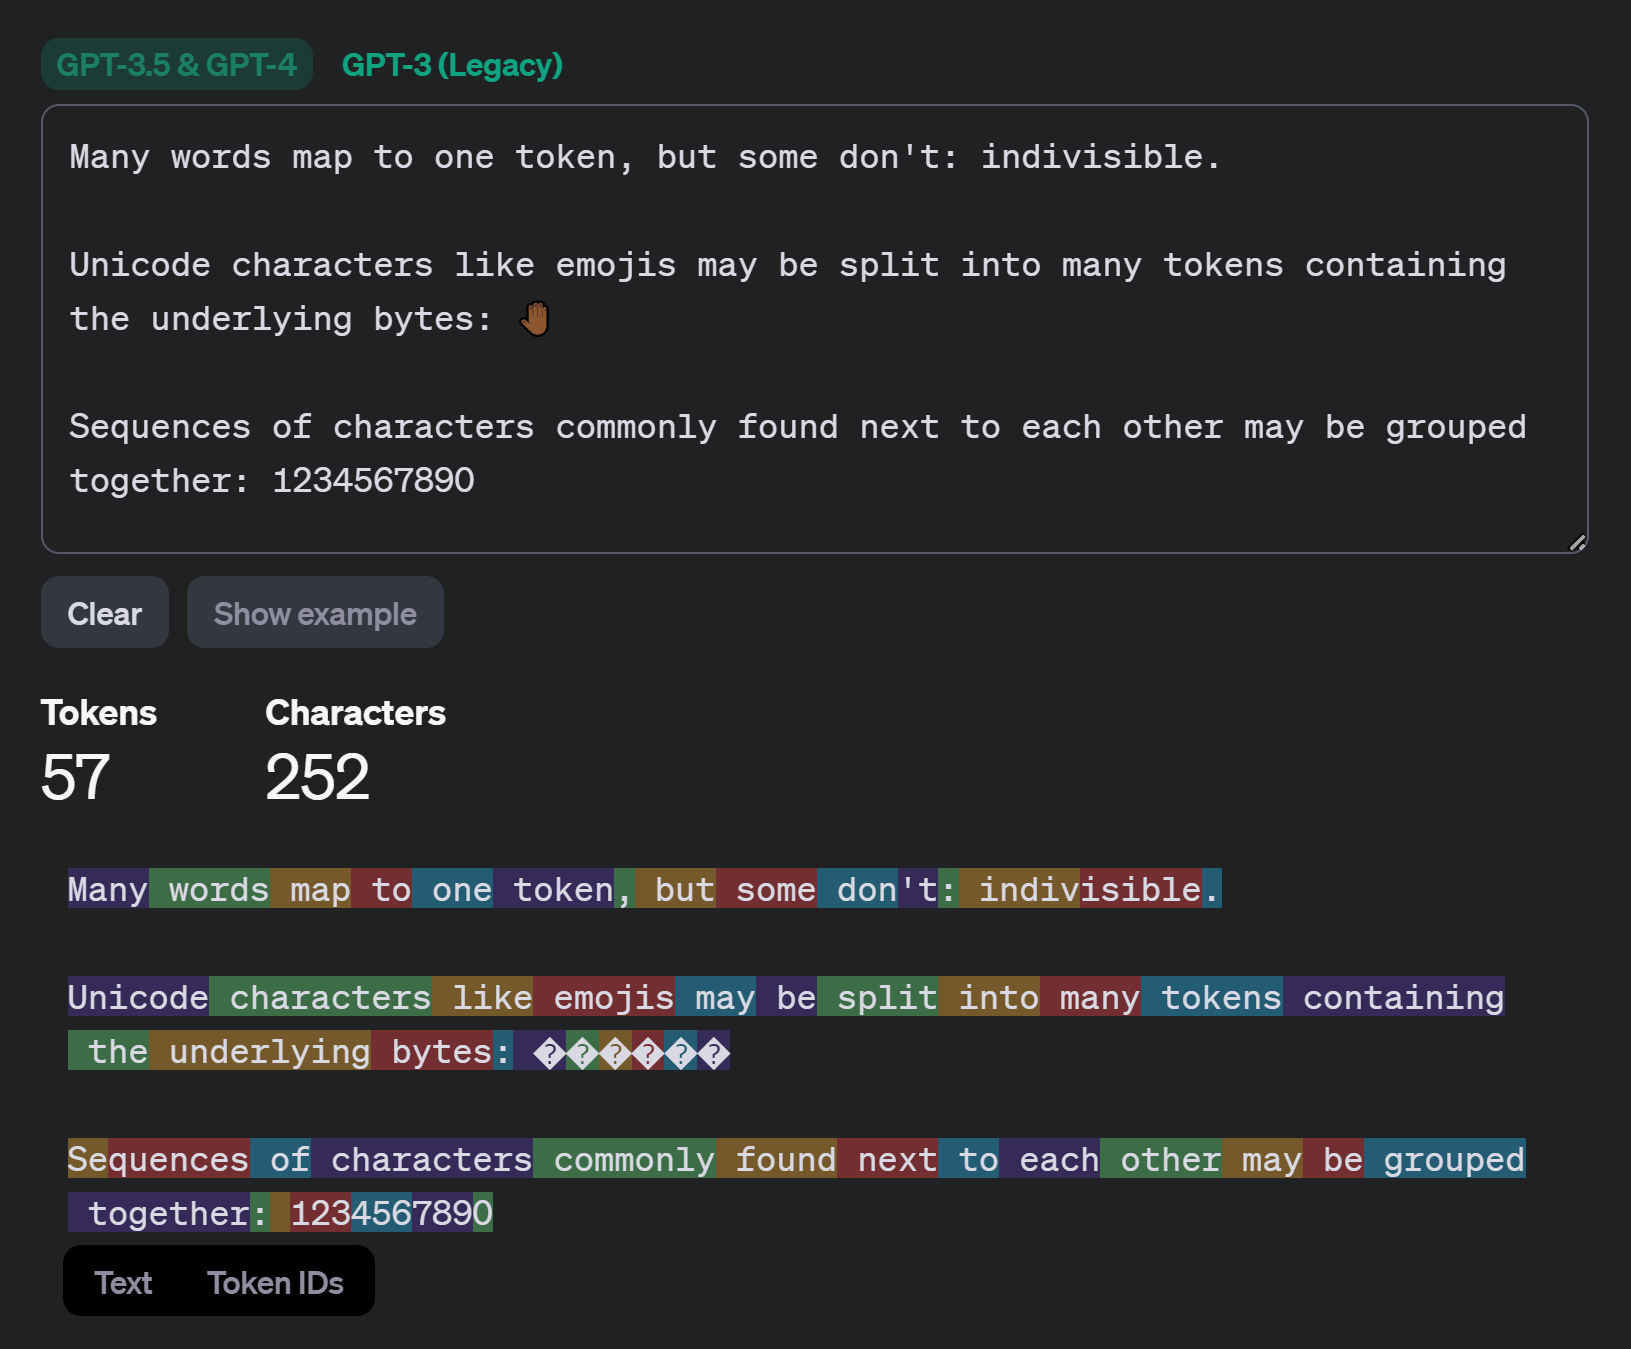

In [ ]:
# For calculations sake lets just say we have ~50 tokens per shipment (probably a little less in reality - so if anything overestimating)
priceCalc = ((full_tradeData_unStr.shape[0]*50)/1000000)*0.02
print("For our dataset of 10305 shipments, it would cost roughly $"+str(priceCalc)+ " to classify the dataset.")

For our dataset of 10305 shipments, it would cost roughly $0.010305 to classify the dataset.


In [ ]:
full_tradeData_unStr.shape[0]

10305

In [ ]:
# What is the price for 307 million shipments... (I think it was 307.156 ~ really just a guess)
priceCalc = ((307156000*50)/1000000)*0.02
print("For a yearly dataset of 307,156,000 shipments, it would cost roughly $"+str(priceCalc)+ " to classify the dataset.")

For a yearly dataset of 307,156,000 shipments, it would cost roughly $307.156 to classify the dataset.


### THE STRUCTURED MODEL:

*A Random Forest...*

*We have 4 missing values in Weight and Value Columns, so we first must remove them for the model...*

In [ ]:
for col in full_tradeData_str:
  print(col, full_tradeData_str[col].isna().sum())

core_shipment 0
HS Code_encoded 0
Consignee_encoded 0
Consignee Trade Roles_encoded 0
Consignee Ultimate Parent_encoded 0
Shipper_encoded 0
Shipper Country_encoded 0
Shipper Trade Roles_encoded 0
Shipper Ultimate Parent_encoded 0
Shipment Origin_encoded 0
Shipment Destination_encoded 0
Port of Lading_encoded 0
Port of Lading Country_encoded 0
Port of Unlading_encoded 0
Port of Unlading Country_encoded 0
Data Source_encoded 0
Weight (KG) 4
Value (USD) 4


In [ ]:
full_tradeData_str = full_tradeData_str.dropna(subset=["Weight (KG)", "Value (USD)"])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = full_tradeData_str.drop("core_shipment", axis=1)
y = full_tradeData_str["core_shipment"]

In [ ]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


*Well, it performs pretty well...*